
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">

In [3]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/1AA')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/1AA


In [4]:
#@title import libs
import os
import cv2
from PIL import Image
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
#Import dataset image from API Kaagle
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dairon200599","key":"57b511d96863f71a539c6d5007f0a488"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kaustubhb999/tomatoleaf

 98% 176M/179M [00:09<00:00, 18.7MB/s]
100% 179M/179M [00:09<00:00, 19.2MB/s]


In [15]:
!unzip tomatoleaf

Archive:  tomatoleaf.zip
replace tomato/cnn_train.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [16]:
!ls

'Copia de Copia de tomato.ipynb'   tomato	    tomato.zip
 kaggle.json			   tomatoleaf.zip


In [57]:
from glob import glob
folders = glob("/content/drive/MyDrive/1AA/tomato/train/*")
folders

['/content/drive/MyDrive/1AA/tomato/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/1AA/tomato/train/Tomato___Early_blight',
 '/content/drive/MyDrive/1AA/tomato/train/Tomato___Late_blight',
 '/content/drive/MyDrive/1AA/tomato/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/1AA/tomato/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/1AA/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/1AA/tomato/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/1AA/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/1AA/tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/1AA/tomato/train/Tomato___healthy']

Text(0.5, 1.0, 'Tomato___Bacterial_spot')

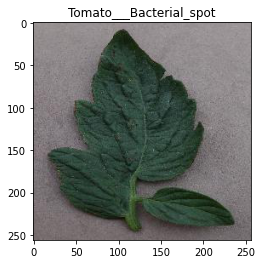

In [58]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/1AA/tomato/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Tomato___Bacterial_spot")

Text(0.5, 1.0, 'Tomato___Early_blight')

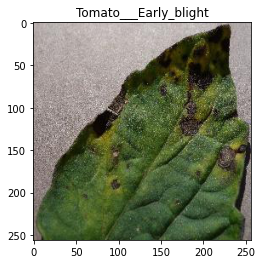

In [59]:
plt.imshow(plt.imread("/content/drive/MyDrive/1AA/tomato/train/Tomato___Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG"))
plt.title("Tomato___Early_blight")

In [60]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [61]:
image_size = [256, 256]
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)


In [62]:
for layer in vgg.layers:
    layer.trainable = False

In [63]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = prediction)

In [64]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [65]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1./255)
train_set = train_data_gen.flow_from_directory('./tomato/train/', target_size = (256,256), batch_size = 32, class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [67]:
test_set = test_data_gen.flow_from_directory('./tomato/val/', target_size = (256,256), batch_size = 32, class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [ ]:
history = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

<ipython-input-68-a2ea548c39c2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
 22/313 [=>............................] - ETA: 1:22:21 - loss: 2.4627 - accuracy: 0.3097

In [ ]:
model.save('modelo_01.h5')

In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');